<a href="https://colab.research.google.com/github/kdstheace/Project_FinancialAnalysis/blob/main/Financial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import seaborn as sns
sns.set(style='darkgrid')

In [60]:
#この部分はデータセットや結果を一部あるいは全部見る時使われる部分なので実行しなくても構いません。
# pd.set_option('display.max_row', 100)
# pd.set_option('display.max_columns', 100)

In [2]:
#データセットを呼び出す
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
#データ前処理(Preprocessing)-1
raw_data = pd.read_csv('drive/MyDrive/Colab Notebooks/data/bankruptcy_data.csv')
# raw_data = pd.read_csv('drive/MyDrive/Colab Notebooks/Data/data.csv')

raw_data.columns = raw_data.columns.str.strip()
raw_data.columns = raw_data.columns.str.replace(" " ,"_")
raw_data.rename(columns = {'Bankrupt?' :'Bankrupt' },inplace=True)

X = raw_data.drop('Bankrupt', axis=1).drop('Liability-Assets_Flag', axis=1).drop('Net_Income_Flag', axis=1)\
            .drop('Revenue_Per_Share_(Yuan_¥)', axis=1).drop('Operating_Profit_Per_Share_(Yuan_¥)', axis=1)\
            .drop('Per_Share_Net_profit_before_tax_(Yuan_¥)', axis=1).drop('Interest-bearing_debt_interest_rate', axis=1)\
            .drop('No-credit_Interval', axis=1)\
            .drop('Long-term_fund_suitability_ratio_(A)', axis=1)\
            .drop('Borrowing_dependency', axis=1)\
            .drop('Operating_profit_per_person', axis=1)\
            .drop('ROA(C)_before_interest_and_depreciation_before_interest', axis=1)\
            .drop('ROA(A)_before_interest_and_%_after_tax', axis=1)\
            .drop('Net_Value_Per_Share_(B)', axis=1)\
            .drop('Net_Value_Per_Share_(A)', axis=1)\
            .drop('Net_Value_Per_Share_(C)', axis=1)\
            .drop('Realized_Sales_Gross_Margin', axis=1)\
            .drop('Realized_Sales_Gross_Profit_Growth_Rate', axis=1)\
            .drop('Interest_Coverage_Ratio_(Interest_expense_to_EBIT)', axis=1)\
            .drop('Cash_Reinvestment_%', axis=1).drop('Interest_Expense_Ratio', axis=1).drop('Contingent_liabilities/Net_worth', axis=1)\
            .drop('Operating_profit/Paid-in_capital', axis=1).drop('Net_profit_before_tax/Paid-in_capital', axis=1)\
            .drop('Cash_flow_rate', axis=1)

y = np.array(raw_data['Bankrupt'])
print(X.shape)
print(y.shape)

(6819, 71)
(6819,)


In [4]:
#データ完全性確認
X.isnull().sum()

ROA(B)_before_interest_and_depreciation_after_tax    0
Operating_Gross_Margin                               0
Operating_Profit_Rate                                0
Pre-tax_net_Interest_Rate                            0
After-tax_net_Interest_Rate                          0
                                                    ..
Gross_Profit_to_Sales                                0
Net_Income_to_Stockholder's_Equity                   0
Liability_to_Equity                                  0
Degree_of_Financial_Leverage_(DFL)                   0
Equity_to_Liability                                  0
Length: 71, dtype: int64

In [48]:
#データ前処理(Preprocessing)-2：スケーリング・One-Hot Encoding
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
display(scaled_X)

categorized_y = to_categorical(y)
print(categorized_y.shape)

,ROA(B)_before_interest_and_depreciation_after_tax,Operating_Gross_Margin,Operating_Profit_Rate,Pre-tax_net_Interest_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,Continuous_interest_rate_(after_tax),Operating_Expense_Rate,Research_and_development_expense_rate,Tax_rate_(A),Persistent_EPS_in_the_Last_Four_Seasons,Cash_Flow_Per_Share,Operating_Profit_Growth_Rate,After-tax_Net_Profit_Growth_Rate,Regular_Net_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Current_Ratio,Quick_Ratio,Total_debt/Total_net_worth,Debt_ratio_%,Net_worth/Assets,Inventory_and_accounts_receivable/Net_value,Total_Asset_Turnover,Accounts_Receivable_Turnover,Average_Collection_Days,Inventory_Turnover_Rate_(times),Fixed_Assets_Turnover_Frequency,Net_Worth_Turnover_Rate_(times),Revenue_per_person,Allocation_rate_per_person,Working_Capital_to_Total_Assets,Quick_Assets/Total_Assets,Current_Assets/Total_Assets,Cash/Total_Assets,Quick_Assets/Current_Liability,Cash/Current_Liability,Current_Liability_to_Assets,Operating_Funds_to_Liability,Inventory/Working_Capital,Inventory/Current_Liability,Current_Liabilities/Liability,Working_Capital/Equity,Current_Liabilities/Equity,Long-term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income/Total_expense,Total_expense/Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Working_capitcal_Turnover_Rate,Cash_Turnover_Rate,Cash_Flow_to_Sales,Fixed_Assets_to_Assets,Current_Liability_to_Liability,Current_Liability_to_Equity,Equity_to_Long-term_Liability,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,Gross_Profit_to_Sales,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_(DFL),Equity_to_Liability
0,-2.400361,-0.383334,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.616334,-0.750713,-0.829388,-1.794106,-0.671081,0.019997,-0.012031,-0.012262,-0.010299,-0.182259,-0.013721,-0.119118,-0.012111,-0.034237,-0.026226,1.750845,-1.750845,-0.332027,-0.540344,-0.045967,-0.038333,-0.661726,-0.407123,-0.155185,-0.017024,-0.038222,-2.393729,-1.155833,-1.520572,-0.861820,-0.020937,-0.072818,1.126267,-0.563752,-0.045371,-0.095887,-0.412896,-1.245334,0.568487,-0.094979,-1.232594,-0.043610,1.314027,-0.175421,1.299751,-0.019619,-0.685397,0.003948,-0.012111,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-2.254317,-0.049491,-0.383465,-0.861611,0.680171,-0.060031,-0.622067
1,-0.598450,0.135068,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.616334,-0.750713,-0.829388,-0.597379,-0.303533,0.010035,0.039473,0.039663,-0.001930,0.207732,-0.013721,0.027847,-0.012111,-0.034237,-0.026226,1.075727,-1.075727,-0.355356,-0.762702,-0.045967,-0.038333,2.220288,-0.116896,-0.357471,-0.017024,-0.038222,-1.067133,-1.351081,-1.558280,-0.783873,-0.020937,-0.072818,-0.670363,-0.361990,1.169887,-0.095887,-2.192039,-0.328953,-0.123797,-0.094979,-0.143474,-0.026740,-0.135126,-0.423919,1.640522,-0.010126,0.006134,0.004193,-0.012111,-2.192039,-0.123797,0.269947,-0.182201,-0.095129,-0.449376,-0.109511,0.527485,-0.309033,-0.049491,0.135253,-0.029804,0.240685,15.129816,-0.535573
2,-1.319910,-0.383759,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,-0.616334,-0.740898,-0.829388,-1.450153,-0.930172,0.010605,0.022853,0.022981,-0.003748,0.611527,-0.013721,-0.006595,-0.012111,-0.034237,-0.026226,1.749724,-1.749724,0.309321,-1.251890,-0.045967,-0.038333,-0.641712,0.662558,-0.687284,-0.017024,-0.038222,0.260402,-0.296712,0.369252,-0.884109,-0.020937,10.391338,0.148933,-0.486462,0.005772,-0.095887,-1.526996,0.591934,0.249651,-0.094979,-0.971327,-0.040430,-0.287204,-0.423919,-0.641164,0.055319,-0.582280,0.004340,-0.012111,-1.526996,0.249651,0.116638,-0.147060,-0.086679,-0.937979,-0.082328,-0.199721,-0.820510,-0.049491,-0.383698,-0.249820,0.679247,-0.062961

(6819, 2)


In [49]:
#データ前処理(Preprocessing)-3：スケーリング・One-Hot Encoding
X_train, X_test, y_train, y_test = train_test_split(scaled_X, categorized_y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5455, 71)
(1364, 71)
(5455, 2)
(1364, 2)


In [7]:
#マシンラーニングモデル設計
model = Sequential()

model.add(Dense(units=100, activation='relu', input_dim=71))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               7200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 13,807
Trainable params: 13,807
Non-trainable params: 0
_________________________________________________________________


In [8]:
#学習
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
171/171 [==============================] - 4s 5ms/step - loss: 0.4005 - accuracy: 0.8935 - val_loss: 0.1120 - val_accuracy: 0.9633
Epoch 2/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0959 - accuracy: 0.9662 - val_loss: 0.1078 - val_accuracy: 0.9655
Epoch 3/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0817 - accuracy: 0.9672 - val_loss: 0.1086 - val_accuracy: 0.9663
Epoch 4/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0703 - accuracy: 0.9726 - val_loss: 0.1068 - val_accuracy: 0.9677
Epoch 5/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9760 - val_loss: 0.1074 - val_accuracy: 0.9648
Epoch 6/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9760 - val_loss: 0.1096 - val_accuracy: 0.9648
Epoch 7/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9763 - val_loss: 0.1150 - val_accuracy: 0.9670
Epoch 

モデル生成が進めていく時のLOSSとACCURACYの変化です。


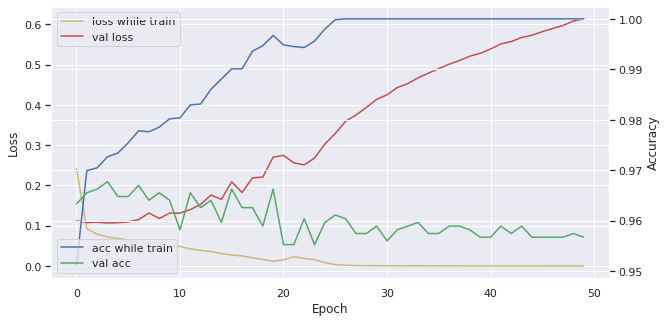

In [55]:
#学習過程を図式化
#Visualize Learning Process

plt.rcParams['figure.figsize'] = (10, 5)
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()


loss_ax.plot(hist.history['loss'], 'y', label='loss while train')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


acc_ax.plot(hist.history['accuracy'], 'b', label='acc while train')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Loss')
acc_ax.set_ylabel('Accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
print('モデル生成が進めていく時のLOSSとACCURACYの変化です。')
plt.show()

In [9]:
#モデル評価
#Model Evaluation

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

43/43 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.9567

loss: 61.38%

accuracy: 95.67%


In [53]:
#testデータ1364個をモデルで予測した時の予測失敗データ及びアキュラシー検証
#test데이터 1364개를 모델로 예측해보았을 때 예측실패 데이터와 예측정확도 검증 

pred = model.predict(X_test)
count = 0
for i in range(1364):
  if np.argmax(pred[i]) != np.argmax(y_test[i]):
    print(i, end=' ')
    count += 1
print()
print('↑ これが1364個のテストデータセット中で間違っているデータのINDEXです。')
print('全体テストデータセット1364個の中で予測が間違ったのは　', count, '個になります。')
print()
print('Accuracy:', 100-(count/1364*100), '%')

67 85 88 124 144 152 194 198 202 211 226 232 275 281 282 284 293 402 

IndexError: ignored

In [52]:
#testデータ1364個をモデルで予測した時の予測失敗データ及びアキュラシー検証
#test데이터에서 랜덤으로 30% split한 410개 데이터를 예측해보았을 때 정확도

X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=1)
pred = model.predict(X_test)
print(X_test.shape)
count = 0
for i in range(410):
  if np.argmax(pred[i]) != np.argmax(y_test[i]):
    print(i, end=' ')
    count += 1
print()
print('↑ これが1364個のテストデータセットから抽出した410個の中で間違っているデータのINDEXです。')
print('1364個のテストデータセットから抽出した410個の中で予測が間違ったのは　', count, '個になります。')
print()
print('Accuracy:', 100-(count/410*100), '%')

(410, 71)
67 85 88 124 144 152 194 198 202 211 226 232 275 281 282 284 293 402 
↑ これが1364個のテストデータセットから抽出した410個の中で間違っているデータのINDEXです。
1364個のテストデータセットから抽出した410個の中で予測が間違ったのは　 18 個になります。

Accuracy: 95.60975609756098 %


In [59]:
#sample
labels=['not_bankrupted', 'bankrupted']
i=7
print(i, "番目の会社の予測した結果: ", labels[np.argmax(y_test[i])])
print(i, "番目の会社の実際結果: ", labels[np.argmax(pred[i])])

7 番目の会社の予測した結果:  not_bankrupted
7 番目の会社の実際結果:  not_bankrupted


In [ ]:
#User Interface
print('입력할 계정 개수: ')
num = int(input())


for i in range(num):
  print('excel을 보고', i+1, '번째 계정의 인덱스를 입력하세요:')
  factor = int(input())

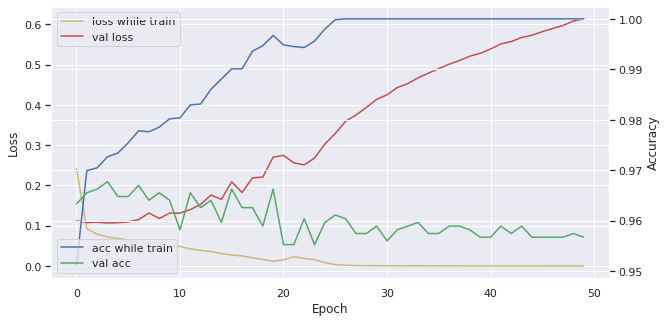

KeyboardInterrupt: ignored

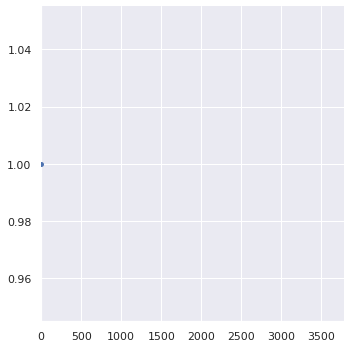

In [ ]:
sns.catplot(x='Operating_Gross_Margin', y='Quick_Ratio', hue='Bankrupt', data=raw_data, kind='swarm')

계정 개수을 입력하세요
10
